In [43]:
from pycocotools.coco import COCO
import layoutparser as lp
import random
import pandas as pd 
import cv2
import glob
import os 
import json

COCO_IMG_PATH  = os.path.join(
    '../layout-parser/examples',
    'Customizing Layout Models with Label Studio Annotation',
    'downloaded-annotations'
)
COCO_ANNO_PATH = os.path.join(COCO_IMG_PATH, 'result.json')

In [27]:
input_file = json.load(open(COCO_ANNO_PATH))

In [35]:
input_file.keys()

dict_keys(['images', 'categories', 'annotations', 'info'])

In [31]:
input_file['images'][:1]

[{'width': 612,
  'height': 792,
  'id': 0,
  'file_name': 'images/information_extraction_from_te-3_6774.jpg'}]

In [34]:
input_file['categories']

[{'id': 0, 'name': 'BibItem'}]

In [40]:
input_file['annotations'][:1]

[{'id': 0,
  'image_id': 0,
  'category_id': 0,
  'segmentation': [],
  'bbox': [108, 325, 396, 31],
  'ignore': 0,
  'iscrowd': 0,
  'area': 12276}]

In [41]:
input_file['info']

{'year': 2022,
 'version': '1.0',
 'description': '',
 'contributor': 'Label Studio',
 'url': '',
 'date_created': '2022-02-09 18:32:47.843315'}

In [44]:
import random

In [4]:
def load_coco_annotations(annotations, coco=None):
    """
    Args:
        annotations (List):
            a list of coco annotaions for the current image
        coco (`optional`, defaults to `False`):
            COCO annotation object instance. If set, this function will
            convert the loaded annotation category ids to category names
            set in COCO.categories
    """
    layout = lp.Layout()
    for ele in annotations:
        x, y, w, h = ele['bbox']
        layout.append(
            lp.TextBlock(
                block = lp.Rectangle(x, y, w+x, h+y),
                type  = ele['category_id'] if coco is None else coco.cats[ele['category_id']]['name'],
                id = ele['id']
            )
        )
        return layout

In [15]:
coco = COCO(COCO_ANNO_PATH)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [58]:
samples = random.sample(coco.imgs.keys(), 2)

/var/folders/89/6dsq1ymj63x009t6wpt25f9h0000gp/T/ipykernel_70083/4131201959.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  samples = random.sample(coco.imgs.keys(), 2)


In [69]:
image_info

{'width': 596,
 'height': 842,
 'id': 19,
 'file_name': 'images/2106.00676v3-11_8b2f.jpg'}

In [70]:
image_id

19

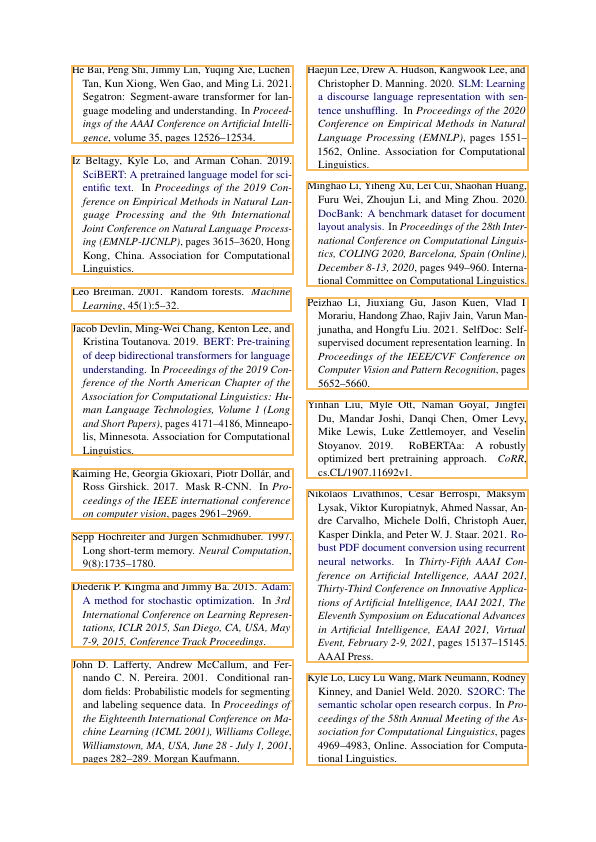

In [65]:
for image_id in samples[:1]:
    image_info = coco.imgs[image_id]
    annotations = coco.loadAnns(coco.getAnnIds([image_id]))

    image = cv2.imread(f'{COCO_IMG_PATH}/{image_info["file_name"]}')
    layout = load_coco_annotations(annotations, coco)

    viz = lp.draw_box(image[...,::-1], layout)    
    display(viz) # show the results

In [55]:
image.shape

(842, 596, 3)

In [54]:
image[...,::-1].shape

(842, 596, 3)

In [46]:
image_info

{'width': 596,
 'height': 842,
 'id': 4,
 'file_name': 'images/2101.10281-5_cba0.jpg'}

In [47]:
coco.getAnnIds([image_id])

[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]

In [50]:
pd.DataFrame(annotations)

,id,image_id,category_id,segmentation,bbox,ignore,iscrowd,area
0,45,4,0,[],"[70, 74, 220, 64]",0,0,14080
1,46,4,0,[],"[70, 148, 220, 75]",0,0,16500
2,47,4,0,[],"[70, 233, 220, 64]",0,0,14080
3,48,4,0,[],"[70, 308, 220, 75]",0,0,16500
4,49,4,0,[],"[70, 393, 220, 42]",0,0,9240
5,50,4,0,[],"[70, 446, 220, 53]",0,0,11660
6,51,4,0,[],"[70, 509, 220, 53]",0,0,11660
7,52,4,0,[],"[70, 572, 218, 20]",0,0,4360
8,53,4,0,[],"[70, 603, 218, 20]",0,0,4360
9,54,4,0,[],"[70, 634, 220, 97]",0,0,21340
